<a href="https://colab.research.google.com/github/lisyaaprl/lisyaaprl.github.io/blob/main/project/PCA_Dataset_Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis pada Dataset Kidney Disease**

**Nama:** Lisya Apriliani

---

**NIM:** 24060119120016

---

**Lab:** A2

>**Principal Component Analysis (PCA)**
adalah teknik yang digunakan untuk menyederhanakan suatu data dengan cara mentransormasi linear sehingga terbentuk sistem koordinat baru dengan variansi maksimum. PCA dapat digunakan untuk mereduksi dimensi suatu data tanpa mengurangi karakteristik data tersebut secara signifikan. PCA mengubah dari sebagian besar variabel asli
yang saling berkorelasi menjadi satu
himpunan variabel baru yang lebih kecil dan
saling bebas

> Prinsip dasar dari algoritma Principal Component Analysis adalah mengurangi satu set data namun tetap mempertahankan sebanyak
mungkin variasi dalam set data tersebut. 



### **Langkah Principal Component Analysis untuk Dataset Kidney**

**1. Import Library dan Load Dataset Kidney Disease**

---

>Langkah pertama untuk melakukan PCA adalah import library dan fungsi yang diperlukan yaitu pandas, pyplot dari library matplotlib, StandarScaler dari library sklearn.preprocessing, PCA dari library sklearn.decomposition.

>Setelah import fungsi dan library, maka load dataset yang digunakan. Pada tugas ini digunakan dataset kidney disease yang diambil dari url lalu diload ke dataframe Pandas dengan menggunakan pd.read_csv(url, names=names) dan dimasukkan ke dalam variabel df.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://raw.githubusercontent.com/lisyaaprl/datasetLisya/main/kidney-disease.csv"
names = ['BP', 'SG', 'Albumin', 'Sugar', 'RBC', 'BU', 'SC', 'Sodium', 'Pottasium', 'Hb', 'WBCC', 'RBCC', 'Htn', 'Class']
# load dataset into Pandas dataframe
df = pd.read_csv(url, names=names)
df.head()

,BP,SG,Albumin,Sugar,RBC,BU,SC,Sodium,Pottasium,Hb,WBCC,RBCC,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


**2. Standarisasi Data**

---

>Langkah selanjutnya adalah melakukan standarisasi data untuk menskalakan fitur dalam data sebelum menerapkan PCA. Standarisasi data dilakukan menggunakan StandarScaler yang akan membuat setiap fitur memiliki nilai rata-rata 0 dan variansi 1.

>Untuk melakukan standarisasi, fitur - fitur dimasukan ke dalam suatu array dengan features. Selanjutnya, nilai - nilai fitur dipisahkan dengan df.loc[:, features].values. Lalu target atau class juga dipisahkan dengan df.loc[:, ['Class']].values. Terakhir, lakukan standarisasi dengan StandardScaler().fit_transform(x).

In [ ]:
features = ['BP', 'SG', 'Albumin', 'Sugar', 'RBC', 'BU', 'SC', 'Sodium', 'Pottasium', 'Hb', 'WBCC', 'RBCC', 'Htn']
# Separating out features
x = df.loc[:, features].values
# separating out the target
y = df.loc[:, ['Class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

**3. Proyeksi PCA ke 2D**

---

Langkah selanjutnya adalah memproyeksikan dataset kidney disease yang memiliki 13 kolom yaitu 'BP', 'SG', 'Albumin', 'Sugar', 'RBC', 'BU', 'SC', 'Sodium', 'Pottasium', 'Hb', 'WBCC', 'RBCC', 'Htn' menjadi 2 dimensi.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

**4. Visualisasikan Proyeksi 2D**

---

Selanjutnya, kita bisa memplotting atau memvisualisasikan data dua dimensi dengan menggunakan pyplot.

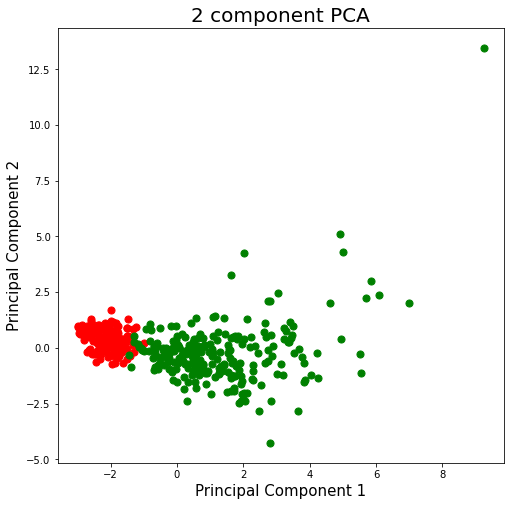

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
target = [0,1]
colors = ['r', 'g']
for target, color in zip(target,colors):
  indicesToKeep = finalDf['Class'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c = color,
             s = 50)
  #ax.legend(target)
  ax.grid()

**5. Varians yang Dijelaskan**

---

Pada tahap ini, kita dapat mengetahui bahwa untuk principal component 1 berisi 32,89% varian dan principal component 2 berisi 11,18% varian. Jika digabungkan, kedua komponen tersebut mengandung 44.07% informasi.

In [ ]:
pca.explained_variance_ratio_

array([0.32885225, 0.11177842])